
<a href='https://erdogant.medium.com/membership' target='_blank'><img height='200' style='border:0px;height:36px;' src='https://erdogant.github.io/bnlearn/pages/html/_images/logo.png' border='0' alt='Follow me on Medium' /></a>

# Bnlearn for Python

Welcome to the notebook of **bnlearn**. bnlearn is Python package for learning the graphical structure of Bayesian networks, parameter learning, inference and sampling methods. Because probabilistic graphical models can be difficult in usage, Bnlearn for python (this package) is build on the pgmpy package and contains the most-wanted pipelines. Navigate to API documentations for more detailed information.

The core functionalities are:
<br>
<b>* Causal Discovery</b>
<br>
<b>* Structure Learning</b>
<br>
<b>* Parameter Learning</b>
<br>
<b>* Inferences using do-calculus</b>
<br>
<br>

---

## Read the Medium blog for more detailed information.

#### [1. A Step-by-Step Guide in detecting causal relationships using Bayesian Structure Learning in Python](https://towardsdatascience.com/a-step-by-step-guide-in-detecting-causal-relationships-using-bayesian-structure-learning-in-python-c20c6b31cee5)


#### [2. A step-by-step guide in designing knowledge-driven models using Bayesian theorem.](https://towardsdatascience.com/a-step-by-step-guide-in-designing-knowledge-driven-models-using-bayesian-theorem-7433f6fd64be)

#### [3. The Power of Bayesian Causal Inference: A Comparative Analysis of Libraries to Reveal Hidden Causality in Your Dataset.](https://towardsdatascience.com/the-power-of-bayesian-causal-inference-a-comparative-analysis-of-libraries-to-reveal-hidden-d91e8306e25e)

#### [4. Chat with Your Dataset using Bayesian Inferences.](https://towardsdatascience.com/chat-with-your-dataset-using-bayesian-inferences-bfd4dc7f8dcd)





<br>

---


## Github
* [Github](https://github.com/erdogant/bnlearn)
* [Documentation pages](https://erdogant.github.io/bnlearn/)

<br>

---

## Github

<a href="https://colab.research.google.com/github/erdogant/bnlearn/blob/master/notebooks/bnlearn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<br>

---


## Support
This library runs on coffee :) You can [support](https://erdogant.github.io/pca/pages/html/Documentation.html) in various ways, have a look at the [sponser page](https://erdogant.github.io/pca/pages/html/Documentation.html). Report bugs, issues and feature extensions at [github page](https://github.com/erdogant/pca).

<a href='https://www.buymeacoffee.com/erdogant' target='_blank'><img height='36' style='border:0px;height:36px;' src='https://cdn.ko-fi.com/cdn/kofi1.png?v=3' border='0' alt='Buy Me a Coffee at ko-fi.com' /></a>
<a href='https://erdogant.medium.com/subscribe' target='_blank'><img height='50' style='border:0px;height:36px;' src='https://erdogant.github.io/images/medium_follow_me.jpg' border='0' alt='Follow me on Medium' /></a>

---



In [ ]:
!pip install bnlearn

In [ ]:
import bnlearn as bn

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[bnlearn] >bayes DAG created.
[bnlearn]> Set node properties.
[bnlearn]> Set edge properties.
[bnlearn] >Plot based on Bayesian model


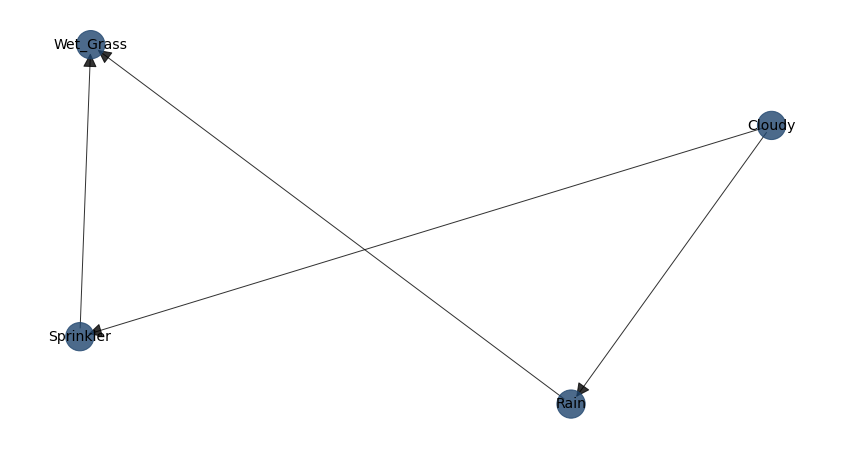

target,Cloudy,Sprinkler,Rain,Wet_Grass
source,,,,
Cloudy,False,True,True,False
Sprinkler,False,False,False,True
Rain,False,False,False,True
Wet_Grass,False,False,False,False


In [ ]:
# Define the causal dependencies based on your expert/domain knowledge.
# Left is the source, and right is the target node.
edges = [('Cloudy', 'Sprinkler'),
         ('Cloudy', 'Rain'),
         ('Sprinkler', 'Wet_Grass'),
         ('Rain', 'Wet_Grass')]


# Create the DAG
DAG = bn.make_DAG(edges)

# Plot the DAG
bn.plot(DAG)

# DAG is stored in an adjacency matrix
DAG["adjmat"]


In [ ]:
# Import the library
from pgmpy.factors.discrete import TabularCPD

# Cloudy
cpt_cloudy = TabularCPD(variable='Cloudy', variable_card=2, values=[[0.3], [0.7]])
print(cpt_cloudy)

+-----------+-----+
| Cloudy(0) | 0.3 |
+-----------+-----+
| Cloudy(1) | 0.7 |
+-----------+-----+


In [ ]:
cpt_rain = TabularCPD(variable='Rain', variable_card=2,
                      values=[[0.8, 0.2],
                              [0.2, 0.8]],
                      evidence=['Cloudy'], evidence_card=[2])
print(cpt_rain)

+---------+-----------+-----------+
| Cloudy  | Cloudy(0) | Cloudy(1) |
+---------+-----------+-----------+
| Rain(0) | 0.8       | 0.2       |
+---------+-----------+-----------+
| Rain(1) | 0.2       | 0.8       |
+---------+-----------+-----------+


In [ ]:

cpt_sprinkler = TabularCPD(variable='Sprinkler', variable_card=2,
                           values=[[0.5, 0.9],
                                   [0.5, 0.1]],
                           evidence=['Cloudy'], evidence_card=[2])
print(cpt_sprinkler)



+--------------+-----------+-----------+
| Cloudy       | Cloudy(0) | Cloudy(1) |
+--------------+-----------+-----------+
| Sprinkler(0) | 0.5       | 0.9       |
+--------------+-----------+-----------+
| Sprinkler(1) | 0.5       | 0.1       |
+--------------+-----------+-----------+


In [ ]:
cpt_wet_grass = TabularCPD(variable='Wet_Grass', variable_card=2,
                           values=[[1, 0.1, 0.1, 0.01],
                                   [0, 0.9, 0.9, 0.99]],
                           evidence=['Sprinkler', 'Rain'],
                           evidence_card=[2, 2])
print(cpt_wet_grass)

+--------------+--------------+--------------+--------------+--------------+
| Sprinkler    | Sprinkler(0) | Sprinkler(0) | Sprinkler(1) | Sprinkler(1) |
+--------------+--------------+--------------+--------------+--------------+
| Rain         | Rain(0)      | Rain(1)      | Rain(0)      | Rain(1)      |
+--------------+--------------+--------------+--------------+--------------+
| Wet_Grass(0) | 1.0          | 0.1          | 0.1          | 0.01         |
+--------------+--------------+--------------+--------------+--------------+
| Wet_Grass(1) | 0.0          | 0.9          | 0.9          | 0.99         |
+--------------+--------------+--------------+--------------+--------------+


In [ ]:
# Update DAG with the CPTs
model = bn.make_DAG(DAG, CPD=[cpt_cloudy, cpt_sprinkler, cpt_rain, cpt_wet_grass])

# Print the CPTs
bn.print_CPD(model)

[bnlearn] >No changes made to existing bayes DAG.
[bnlearn] >Add CPD: Cloudy
[bnlearn] >Add CPD: Sprinkler
[bnlearn] >Add CPD: Rain
[bnlearn] >Add CPD: Wet_Grass
[bnlearn] >Checking CPDs..
[bnlearn] >Check for DAG structure. Correct: True
CPD of Cloudy:
+-----------+-----+
| Cloudy(0) | 0.3 |
+-----------+-----+
| Cloudy(1) | 0.7 |
+-----------+-----+
CPD of Sprinkler:
+--------------+-----------+-----------+
| Cloudy       | Cloudy(0) | Cloudy(1) |
+--------------+-----------+-----------+
| Sprinkler(0) | 0.5       | 0.9       |
+--------------+-----------+-----------+
| Sprinkler(1) | 0.5       | 0.1       |
+--------------+-----------+-----------+
CPD of Rain:
+---------+-----------+-----------+
| Cloudy  | Cloudy(0) | Cloudy(1) |
+---------+-----------+-----------+
| Rain(0) | 0.8       | 0.2       |
+---------+-----------+-----------+
| Rain(1) | 0.2       | 0.8       |
+---------+-----------+-----------+
CPD of Wet_Grass:
+--------------+--------------+--------------+------------

In [ ]:
q1 = bn.inference.fit(model, variables=['Wet_Grass'], evidence={'Sprinkler':0})
print(q1.df)

[bnlearn] >Variable Elimination..


  0%|          | 0/2 [00:00<?, ?it/s]

  0%|          | 0/2 [00:00<?, ?it/s]

+----+-------------+----------+
|    |   Wet_Grass |        p |
+====+=============+==========+
|  0 |           0 | 0.383846 |
+----+-------------+----------+
|  1 |           1 | 0.616154 |
+----+-------------+----------+
   Wet_Grass         p
0          0  0.383846
1          1  0.616154


In [ ]:
q2 = bn.inference.fit(model, variables=['Rain'], evidence={'Sprinkler':0, 'Cloudy':1})
print(q2.df)

[bnlearn] >Variable Elimination..


0it [00:00, ?it/s]

0it [00:00, ?it/s]

+----+--------+-----+
|    |   Rain |   p |
+====+========+=====+
|  0 |      0 | 0.2 |
+----+--------+-----+
|  1 |      1 | 0.8 |
+----+--------+-----+
   Rain    p
0     0  0.2
1     1  0.8


In [ ]:
q3 = bn.inference.fit(model, variables=['Wet_Grass','Rain'], evidence={'Sprinkler':1})
print(q3.df)

[bnlearn] >Variable Elimination..


  0%|          | 0/1 [00:00<?, ?it/s]

  0%|          | 0/1 [00:00<?, ?it/s]

+----+-------------+--------+------------+
|    |   Wet_Grass |   Rain |          p |
+====+=============+========+============+
|  0 |           0 |      0 | 0.0609091  |
+----+-------------+--------+------------+
|  1 |           1 |      0 | 0.548182   |
+----+-------------+--------+------------+
|  2 |           0 |      1 | 0.00390909 |
+----+-------------+--------+------------+
|  3 |           1 |      1 | 0.387      |
+----+-------------+--------+------------+
   Wet_Grass  Rain         p
0          0     0  0.060909
1          1     0  0.548182
2          0     1  0.003909
3          1     1  0.387000
